# Airline On-Time Statistics and Delay Causes
## by Partha Goswami

## Table of Contents

1. Introduction of the data set and the related sources
2. Downloading the data
3. Importing related packages
4. Loading the data set
5. Preliminary Wrangling
6. Uni-variate Analysis
7. Bi-variate Analysis
8. Multi-variate Analysis

### Introduction of the data set and the related sources

> The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled and diverted flights appears in DOT's monthly Air Travel Consumer Report, published about 30 days after the month's end, as well as in summary tables posted on this website (https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp). BTS began collecting details on the causes of flight delays in June 2003. Summary statistics and raw data are made available to the public at the time the Air Travel Consumer Report is released. (Data referred from - https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp)


### Downloading the data

> Data is downloaded and extracted as "518028902_22020_130_airline_delay_causes.csv" file, at the same directory of this jupyter notebook file (Data Source: https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp)

### Importing the packages

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import glob
import os
import datetime
import math
from math import radians, sin, cos, acos
import matplotlib.cm
#from __future__ import unicode_literals
#import joypy
no_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

### Loading the data set

In [2]:
df_flights = pd.read_csv('518028902_22020_130_airline_delay_causes.csv')
df_flights.head(2)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,2,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",42,7.0,1.71,0.14,...,0.0,5.08,0,0,602,164,30,10,0,398
1,2020,2,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",104,18.0,6.64,0.05,...,0.0,8.56,0,2,1651,491,6,238,0,916


### Preliminary Wrangling

#### Shape

In [3]:
# Let's see the shape of the data frame
df_flights.shape

(1769, 21)

#### Columns

In [4]:
# Let's view the columns
df_flights.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

#### Checking null entries per column

In [5]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1769 entries, 0 to 1768
Data columns (total 21 columns):
year                   1769 non-null int64
month                  1769 non-null int64
carrier                1769 non-null object
carrier_name           1769 non-null object
airport                1769 non-null object
airport_name           1769 non-null object
arr_flights            1769 non-null int64
arr_del15              1767 non-null float64
carrier_ct             1769 non-null float64
 weather_ct            1769 non-null float64
nas_ct                 1769 non-null float64
security_ct            1769 non-null float64
late_aircraft_ct       1769 non-null float64
arr_cancelled          1769 non-null int64
arr_diverted           1769 non-null int64
 arr_delay             1769 non-null int64
 carrier_delay         1769 non-null int64
weather_delay          1769 non-null int64
nas_delay              1769 non-null int64
security_delay         1769 non-null int64
late_aircraft_del

Total number of entries are 1769. All individual columns contain equal number of not-null values. Hence, at this point, no null entries are presumably observed at the column structure of the data frame

#### Checking for duplicates

In [6]:
df_flights.duplicated().sum()

0

No duplicates are observed at this point.

#### Inspecting types of individual columns (cleaning efforts might be required at this activity)

##### Year

In [7]:
df_flights.year.value_counts()

2020    1769
Name: year, dtype: int64

##### Month

In [8]:
df_flights.month.value_counts()

2    1769
Name: month, dtype: int64

##### Carrier

In [9]:
df_flights.carrier.value_counts()

OO    254
MQ    149
DL    145
G4    120
YV    118
AA    111
9E    103
UA    100
YX     97
EV     96
F9     92
WN     89
OH     88
AS     72
B6     64
NK     52
HA     19
Name: carrier, dtype: int64

##### Carrier Names

In [10]:
df_flights.carrier_name.value_counts()

SkyWest Airlines Inc.      254
Envoy Air                  149
Delta Air Lines Inc.       145
Allegiant Air              120
Mesa Airlines Inc.         118
American Airlines Inc.     111
Endeavor Air Inc.          103
United Air Lines Inc.      100
Republic Airline            97
ExpressJet Airlines LLC     96
Frontier Airlines Inc.      92
Southwest Airlines Co.      89
PSA Airlines Inc.           88
Alaska Airlines Inc.        72
JetBlue Airways             64
Spirit Air Lines            52
Hawaiian Airlines Inc.      19
Name: carrier_name, dtype: int64

Please note that, we have carrier as well as carrier_name entries, each having 17 different types of entries. Both indicate the same data and the carrier code might not be understandable for many audience types, when & while we would plot the data. Hence, let's remove carrier column and let's keep the carrier_name column only.

##### Code & Test - Dropping carrier column

In [11]:
df_flights.drop('carrier', axis=1, inplace=True)
df_flights.columns

Index(['year', 'month', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

##### Airport & Airport_name

In [12]:
df_flights.airport.value_counts()

PIT    16
MSY    16
BNA    16
RDU    16
JAX    15
PHL    15
DTW    15
IND    15
MCI    15
CLE    15
BDL    14
LGA    14
CLT    14
RIC    14
ATL    14
OMA    14
BWI    14
DCA    14
MSP    14
CMH    14
AUS    14
ROC    13
CVG    13
IAH    13
BUF    13
ALB    13
DFW    13
STL    13
EWR    13
PVD    13
       ..
DDC     1
LBF     1
CMX     1
PIR     1
EAU     1
BRW     1
XWA     1
GGG     1
BLV     1
ABI     1
TWF     1
SWO     1
SHR     1
ITH     1
CMI     1
HIB     1
LAR     1
OWB     1
JLN     1
SCC     1
DVL     1
TTN     1
PPG     1
LBE     1
RKS     1
HHH     1
GCK     1
BLI     1
HYS     1
PUB     1
Name: airport, Length: 350, dtype: int64

In [13]:
df_flights.airport_name.value_counts()

Nashville, TN: Nashville International                                 16
Raleigh/Durham, NC: Raleigh-Durham International                       16
New Orleans, LA: Louis Armstrong New Orleans International             16
Pittsburgh, PA: Pittsburgh International                               16
Detroit, MI: Detroit Metro Wayne County                                15
Indianapolis, IN: Indianapolis International                           15
Philadelphia, PA: Philadelphia International                           15
Cleveland, OH: Cleveland-Hopkins International                         15
Kansas City, MO: Kansas City International                             15
Jacksonville, FL: Jacksonville International                           15
Atlanta, GA: Hartsfield-Jackson Atlanta International                  14
Minneapolis, MN: Minneapolis-St Paul International                     14
New York, NY: LaGuardia                                                14
Hartford, CT: Bradley International   

We would drop airport column as the purpose would be served by airport_name column itself.

##### Code & Test - Dropping airport column

In [14]:
df_flights.drop('airport', axis=1, inplace=True)
df_flights.columns

Index(['year', 'month', 'carrier_name', 'airport_name', 'arr_flights',
       'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct', 'security_ct',
       'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', ' arr_delay',
       ' carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'],
      dtype='object')

Also, we note that, airport city and states are also present within the airport_name column. Let's create two columns for airport_city and airport_state and let's ensure, airport_name column contains only the airport name, not anything extra.

##### Code & Test - Spliting the airport name column to create the city and state columns (airport name should contain only airport name)

In [15]:
df_flights[['city_state_name','airport_name_updated']] = df_flights.airport_name.str.split(':', expand=True)
df_flights['airport_name_updated'] = df_flights['airport_name_updated'].str.lstrip()
df_flights[['city_name','state_name']] = df_flights.city_state_name.str.split(',', expand=True)
df_flights['state_name'] = df_flights['state_name'].str.lstrip()
df_flights.drop('airport_name', axis=1, inplace=True)
df_flights.drop('city_state_name', axis=1, inplace=True)
df_flights.rename(columns = {'airport_name_updated':'airport_name'}, inplace = True) 
df_flights.head(3)

,year,month,carrier_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,...,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,airport_name,city_name,state_name
0,2020,2,Endeavor Air Inc.,42,7.0,1.71,0.14,0.06,0.0,5.08,...,0,602,164,30,10,0,398,Lehigh Valley International,Allentown/Bethlehem/Easton,PA
1,2020,2,Endeavor Air Inc.,104,18.0,6.64,0.05,2.74,0.0,8.56,...,2,1651,491,6,238,0,916,Alexandria International,Alexandria,LA
2,2020,2,Endeavor Air Inc.,168,27.0,8.28,0.18,4.32,0.0,14.22,...,0,1777,364,16,236,0,1161,Augusta Regional at Bush Field,Augusta,GA


In [16]:
# Let's see the columns again
df_flights.columns

Index(['year', 'month', 'carrier_name', 'arr_flights', 'arr_del15',
       'carrier_ct', ' weather_ct', 'nas_ct', 'security_ct',
       'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', ' arr_delay',
       ' carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'airport_name', 'city_name', 'state_name'],
      dtype='object')

##### Code & Test: Rename arr_flights to something more meaningful

In [17]:
df_flights.rename(columns = {'arr_flights':'arrival_flight_count'}, inplace = True)
df_flights.columns

Index(['year', 'month', 'carrier_name', 'arrival_flight_count', 'arr_del15',
       'carrier_ct', ' weather_ct', 'nas_ct', 'security_ct',
       'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', ' arr_delay',
       ' carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'airport_name', 'city_name', 'state_name'],
      dtype='object')

##### Inspection: arr_del15 column

arr_del15 corresponds to Arrival Delay Indicator, 15 Minutes or More (1=Yes)
(source: https://www.transtats.bts.gov/FieldInfo.asp?Field_Desc=Arrival%20Delay%20Indicator%2C%2015%20Minutes%20or%20More%20%281%3DYes%29&Field_Type=Num&Lookup_Table=L_YESNO_RESP&Table_ID=236&SYS_Table_Name=T_ONTIME_REPORTING&Sys_Field_Name=ARR_DEL15)

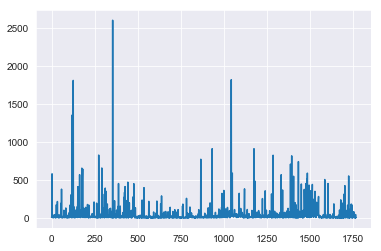

In [18]:
df_flights.arr_del15.plot();

As per the documentation received, its value should be 1 if the delay is of 15 minutes or more. And 0 otherwise. But I can see very large data being present there. So, it looks like, its having delay times in minutes (its might be having a value of zero, when the delay is lesser than 15 minutes). So, let's rename the column accordingly.

I could have converted it to categorical (so that it would contain only yes and no values), but in that case, I would miss the data containing very large values here (and thus missing the inspection).

##### Code & Test: Renaming arr_del15 column

In [19]:
df_flights.rename(columns = {'arr_del15':'arrival_delay_in_min'}, inplace = True)
df_flights.columns

Index(['year', 'month', 'carrier_name', 'arrival_flight_count',
       'arrival_delay_in_min', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'airport_name', 'city_name',
       'state_name'],
      dtype='object')

##### Code & Test: Renaming few other columns containing _ct in their names

In [20]:
df_flights.rename(columns = {'carrier_ct':'air_carrier_related_delay_count'}, inplace = True)
df_flights.rename(columns = {' weather_ct':'weather_related_delay_count'}, inplace = True)
df_flights.rename(columns = {'nas_ct':'NAS_related_delay_count'}, inplace = True)
df_flights.rename(columns = {'security_ct':'security_related_delay_count'}, inplace = True)
df_flights.rename(columns = {'late_aircraft_ct':'late_aircraft_related_delay_count'}, inplace = True)
df_flights.columns

Index(['year', 'month', 'carrier_name', 'arrival_flight_count',
       'arrival_delay_in_min', 'air_carrier_related_delay_count',
       'weather_related_delay_count', 'NAS_related_delay_count',
       'security_related_delay_count', 'late_aircraft_related_delay_count',
       'arr_cancelled', 'arr_diverted', ' arr_delay', ' carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'airport_name', 'city_name', 'state_name'],
      dtype='object')

I have not converted these five to categorical due to the reason that, at a time more than one factor can be true and constitute to the overall delay.

##### Code & Test: Convert delay count columns to integers (from float)

In [21]:
df_flights.arrival_delay_in_min.fillna(0, inplace=True)
df_flights.air_carrier_related_delay_count.fillna(0, inplace=True)
df_flights.weather_related_delay_count.fillna(0, inplace=True)
df_flights.NAS_related_delay_count.fillna(0, inplace=True)
df_flights.security_related_delay_count.fillna(0, inplace=True)
df_flights.late_aircraft_related_delay_count.fillna(0, inplace=True)
df_flights.arrival_delay_in_min = df_flights.arrival_delay_in_min.astype(int, inplace=True)
df_flights.air_carrier_related_delay_count = df_flights.air_carrier_related_delay_count.astype(int, inplace=True)
df_flights.weather_related_delay_count = df_flights.weather_related_delay_count.astype(int, inplace=True)
df_flights.NAS_related_delay_count = df_flights.NAS_related_delay_count.astype(int, inplace=True)
df_flights.security_related_delay_count = df_flights.security_related_delay_count.astype(int, inplace=True)
df_flights.late_aircraft_related_delay_count = df_flights.late_aircraft_related_delay_count.astype(int, inplace=True)
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1769 entries, 0 to 1768
Data columns (total 21 columns):
year                                 1769 non-null int64
month                                1769 non-null int64
carrier_name                         1769 non-null object
arrival_flight_count                 1769 non-null int64
arrival_delay_in_min                 1769 non-null int32
air_carrier_related_delay_count      1769 non-null int32
weather_related_delay_count          1769 non-null int32
NAS_related_delay_count              1769 non-null int32
security_related_delay_count         1769 non-null int32
late_aircraft_related_delay_count    1769 non-null int32
arr_cancelled                        1769 non-null int64
arr_diverted                         1769 non-null int64
 arr_delay                           1769 non-null int64
 carrier_delay                       1769 non-null int64
weather_delay                        1769 non-null int64
nas_delay                            

##### Code & Test - renaming arr_cancelled, arr_diverted, arr_delay, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay columns, deleting extra columns

In [22]:
df_flights.rename(columns = {'arr_cancelled':'arrival_canceled_count'}, inplace = True)
df_flights.rename(columns = {'arr_diverted':'arrival_diverted_count'}, inplace = True)
df_flights.drop(' arr_delay', axis=1, inplace=True) #already we have arrival_delay_in_min column
df_flights.rename(columns = {' carrier_delay':'carrier_delay_in_min'}, inplace = True)
df_flights.rename(columns = {'weather_delay':'weather_delay_in_min'}, inplace = True)
df_flights.rename(columns = {'nas_delay':'nas_delay_in_min'}, inplace = True)
df_flights.rename(columns = {'security_delay':'security_delay_in_min'}, inplace = True)
df_flights.rename(columns = {'late_aircraft_delay':'late_aircraft_delay_in_min'}, inplace = True)

df_flights.arrival_canceled_count.fillna(0, inplace=True)
df_flights.arrival_diverted_count.fillna(0, inplace=True)
df_flights.carrier_delay_in_min.fillna(0, inplace=True)
df_flights.weather_delay_in_min.fillna(0, inplace=True)
df_flights.nas_delay_in_min.fillna(0, inplace=True)
df_flights.security_delay_in_min.fillna(0, inplace=True)
df_flights.late_aircraft_delay_in_min.fillna(0, inplace=True)
df_flights.columns

Index(['year', 'month', 'carrier_name', 'arrival_flight_count',
       'arrival_delay_in_min', 'air_carrier_related_delay_count',
       'weather_related_delay_count', 'NAS_related_delay_count',
       'security_related_delay_count', 'late_aircraft_related_delay_count',
       'arrival_canceled_count', 'arrival_diverted_count',
       'carrier_delay_in_min', 'weather_delay_in_min', 'nas_delay_in_min',
       'security_delay_in_min', 'late_aircraft_delay_in_min', 'airport_name',
       'city_name', 'state_name'],
      dtype='object')

### What is the structure of your dataset?

> Our data frame contains flight delay information. Initially it had the following columns: 'year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct','security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay','security_delay', 'late_aircraft_delay'.

> Later we performed some transformations, renaming and also added/dropped some columns. Finally, we have the following columns with us, namely: 'year', 'month', 'carrier_name', 'arrival_flight_count', 'arrival_delay_in_min', 'air_carrier_related_delay_count','weather_related_delay_count', 'NAS_related_delay_count', 'security_related_delay_count', 'late_aircraft_related_delay_count', 'arrival_canceled_count', 'arrival_diverted_count', 'carrier_delay_in_min', 'weather_delay_in_min', 'nas_delay_in_min', 'security_delay_in_min', 'late_aircraft_delay_in_min', 'airport_name',
 'city_name', 'state_name'.
 
> In total, we have 1769 observations.

### What is/are the main feature(s) of interest in your dataset?

> We have deleted extra columns from our data frame. And all the columns present now, would be of our interest. Idea is, we would analyze delay data per city/state/airport wise and would try to identify the reasons for the delay. Later we would also try to find out the recurrances and probable measures to eradicate the issues. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> All the current features would support our investigation as we would look forward the pattern of delay and try to identify the reasons and possible measurements for better flight experience by lowering the delay.

##### Before we start ploting the data, let's remove the year column, as it contains only 2020 as value

In [23]:
df_flights.drop('year', axis=1, inplace=True)
df_flights.columns

Index(['month', 'carrier_name', 'arrival_flight_count', 'arrival_delay_in_min',
       'air_carrier_related_delay_count', 'weather_related_delay_count',
       'NAS_related_delay_count', 'security_related_delay_count',
       'late_aircraft_related_delay_count', 'arrival_canceled_count',
       'arrival_diverted_count', 'carrier_delay_in_min',
       'weather_delay_in_min', 'nas_delay_in_min', 'security_delay_in_min',
       'late_aircraft_delay_in_min', 'airport_name', 'city_name',
       'state_name'],
      dtype='object')

##### We are deleting month column as well, since we have only february month's data

In [24]:
df_flights.drop('month', axis=1, inplace=True)
df_flights.columns

Index(['carrier_name', 'arrival_flight_count', 'arrival_delay_in_min',
       'air_carrier_related_delay_count', 'weather_related_delay_count',
       'NAS_related_delay_count', 'security_related_delay_count',
       'late_aircraft_related_delay_count', 'arrival_canceled_count',
       'arrival_diverted_count', 'carrier_delay_in_min',
       'weather_delay_in_min', 'nas_delay_in_min', 'security_delay_in_min',
       'late_aircraft_delay_in_min', 'airport_name', 'city_name',
       'state_name'],
      dtype='object')

In [25]:
# let's observe certain distributions
df_flights.arrival_flight_count.describe()

count     1769.000000
mean       324.628604
std        896.920719
min          1.000000
25%         42.000000
50%         87.000000
75%        219.000000
max      18334.000000
Name: arrival_flight_count, dtype: float64

In [26]:
df_flights.airport_name.nunique()

349

In [27]:
df_flights.carrier_name.nunique()

17

Even when we have 1769 observations, but predominantly it comes down to 17 carriers and 349 airports in the USA. Categorically, carrier would be preferred by us for investigation, because of being lower in count.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

#### Graph 1 - Number of flights operated by Carriers

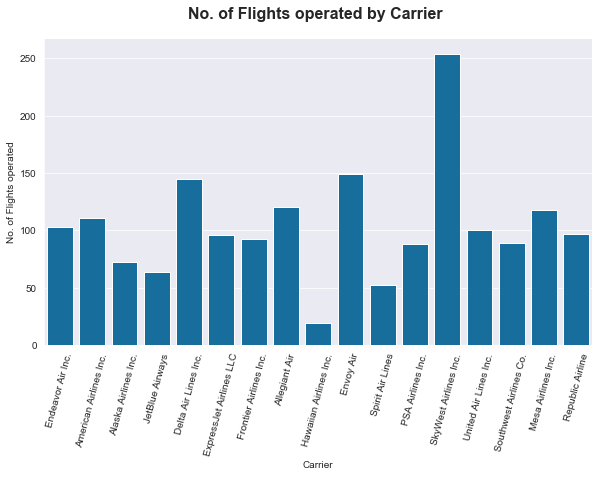

In [28]:
graph = sb.catplot(data = df_flights, x = 'carrier_name', kind = 'count', color = no_color, aspect = 1.7);
graph.set_axis_labels('Carrier', 'No. of Flights operated'),
graph.fig.suptitle('No. of Flights operated by Carrier', y = 1.05, fontsize = 16, fontweight = 'bold');
graph.set_xticklabels(rotation=75);

#### Graph 1 - Observation

"SkyWest Airlines Inc" operated the most number of domestic flights in the USA, followed by "Envoy Air" and "Delta Air Lines Inc". "American Airlines Inc", "Allegiant Air" and "Mesa Airlines Inc" aren't far behind either. "Hawaiian Airlines Inc" opearted the least number of flights in the USA. If we assume that the number of flights operated, is proportionate to the popularity, then I would say, SkyWest is far ahead, in the race. Alternatively, SkyWest must be operating amongst biggest and populous airports in the USA.

#### Graph 2 - Most Flights operated per State

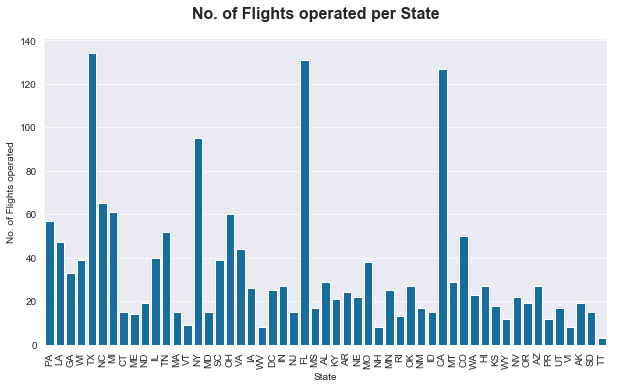

In [29]:
graph = sb.catplot(data = df_flights, x = 'state_name', kind = 'count', color = no_color, aspect = 1.7);
graph.set_axis_labels('State', 'No. of Flights operated'),
graph.fig.suptitle('No. of Flights operated per State', y = 1.05, fontsize = 16, fontweight = 'bold');
graph.set_xticklabels(rotation=90);

#### Graph 2 - Observation

States like Texas, New York, Florida and California operated the most number of flights. Each of the states are larger in size and are having a huge population base.

#### Graph 3 - Flight Arrival Delay Characteristics

In [30]:
df_flights.arrival_delay_in_min.describe()

count    1769.000000
mean       47.832674
std       131.541346
min         0.000000
25%         6.000000
50%        15.000000
75%        35.000000
max      2605.000000
Name: arrival_delay_in_min, dtype: float64

In [31]:
df_flights.carrier_delay_in_min.describe()

count     1769.000000
mean      1149.529112
std       3622.140770
min          0.000000
25%         97.000000
50%        321.000000
75%        864.000000
max      57477.000000
Name: carrier_delay_in_min, dtype: float64

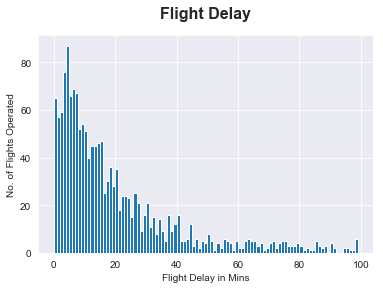

In [32]:
bin_edges = np.arange(0, 100, 1)
plt.hist(data = df_flights, x = 'arrival_delay_in_min', bins = bin_edges);
plt.title("Flight Delay", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Flight Delay in Mins')
plt.ylabel('No. of Flights Operated');

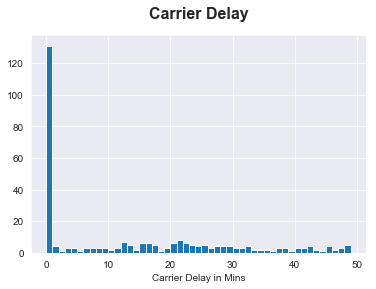

In [33]:
bin_edges = np.arange(0, 50, 1)
plt.hist(data = df_flights, x = 'carrier_delay_in_min', bins = bin_edges);
plt.title("Carrier Delay", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Carrier Delay in Mins');

In [34]:
df_flights.weather_delay_in_min.describe()

count     1769.000000
mean       191.754664
std        807.937410
min          0.000000
25%          0.000000
50%         13.000000
75%        129.000000
max      14600.000000
Name: weather_delay_in_min, dtype: float64

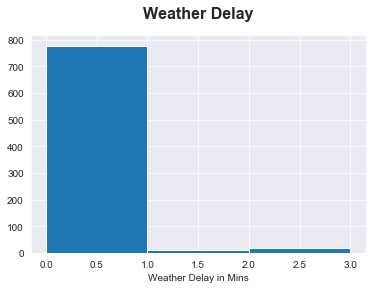

In [35]:
bin_edges = np.arange(0, 4, 1)
plt.hist(data = df_flights, x = 'weather_delay_in_min', bins = bin_edges);
plt.title("Weather Delay", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weather Delay in Mins');

In [36]:
df_flights.nas_delay_in_min.describe()

count     1769.000000
mean       779.407575
std       2789.305320
min          0.000000
25%         47.000000
50%        146.000000
75%        420.000000
max      56818.000000
Name: nas_delay_in_min, dtype: float64

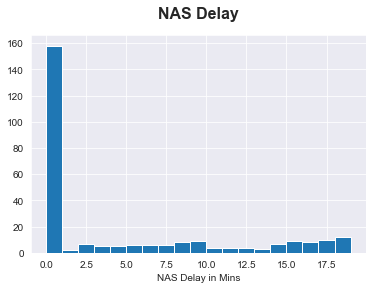

In [37]:
bin_edges = np.arange(0, 20, 1)
plt.hist(data = df_flights, x = 'nas_delay_in_min', bins = bin_edges);
plt.title("NAS Delay", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('NAS Delay in Mins');

In [38]:
df_flights.security_delay_in_min.describe()

count    1769.000000
mean        4.323912
std        32.985972
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1185.000000
Name: security_delay_in_min, dtype: float64

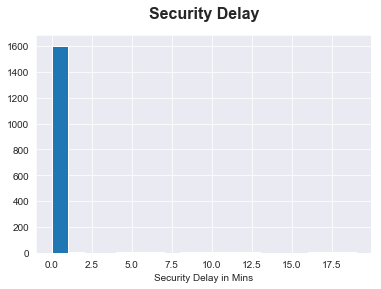

In [39]:
bin_edges = np.arange(0, 20, 1)
plt.hist(data = df_flights, x = 'security_delay_in_min', bins = bin_edges);
plt.title("Security Delay", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Security Delay in Mins');

In [40]:
df_flights.late_aircraft_delay_in_min.describe()

count     1769.000000
mean      1164.444319
std       4134.841494
min          0.000000
25%         39.000000
50%        234.000000
75%        829.000000
max      88977.000000
Name: late_aircraft_delay_in_min, dtype: float64

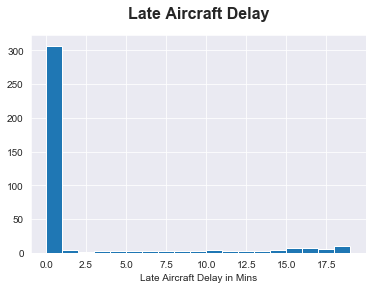

In [41]:
bin_edges = np.arange(0, 20, 1)
plt.hist(data = df_flights, x = 'late_aircraft_delay_in_min', bins = bin_edges);
plt.title("Late Aircraft Delay", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Late Aircraft Delay in Mins');

#### Graph 3 - Observation

Most of the flight delays are less than approximately 15 minutes. But average is dragged to 48, due to some unlikely huge values, in excess of 2500 +. Also 75 % of the data lies within the span of 35 minutes.

Carrier related delay is rather diversed. Most of the cases, there is zero delay. Although 50 % of the cases lie within, say 5 hours (321 minutes). There could be potential flaws for such huge variation of data relating to carrier related delay.

Weather related delay characteristics are similar to that of flight delays, as the 50 % of the data resides within 13 minutes. Average is dragged to 192, because of high max value of 14600. In later part of the exploration, we would inspect, if cancellations are linked with such huge delay or not. Cancellations and carrier related delays could potentially attribute to such huge weather related delays. Plus we would check if such delays are from the northern part of the USA, where still winter/snowy conditions prevail during the months of feb.

50 % of NAS (National Aviation System) delays are within 147 minutes.Usaually the NAS delays might be relating to busier airports or during peak air-traffic conditions, or may be due to other airport-related operational issues.

In 75 % of the cases, security delay is zero minutes. During extremely unlikely security incidents/threats, the delays can be as max as close to 1200 minutes.

Mostly, the late aircraft delay is also, zero. 50 % of its data reside within 234 minutes (4 hours).

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We analyzed various univariate distributions above. We identified major (domestic) airlines opearting in the US, during Feb 2020. Hawaiian Airlines operated the least number of flights, while major US airlines operated as expected.

> On the other hand, bigger & populous states operated more number of flights as expected. In terms of delay, we are seeing some unusually huge data which should be clear while we would do bi-variate and multi-variate analysis.

> Various data type related transformations, along with various other methods of handling NaN values, were employed.Unnecessary columns were dropped, while new columns were created, in order to suitably analyze the data frame.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Unusual deplay data were noticed, hopefully those would be clearer during bi-variate & multi-variate plots. Various transformation operations were performed on the data. The purpose and steps were already described above.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [42]:
df_flights.columns

Index(['carrier_name', 'arrival_flight_count', 'arrival_delay_in_min',
       'air_carrier_related_delay_count', 'weather_related_delay_count',
       'NAS_related_delay_count', 'security_related_delay_count',
       'late_aircraft_related_delay_count', 'arrival_canceled_count',
       'arrival_diverted_count', 'carrier_delay_in_min',
       'weather_delay_in_min', 'nas_delay_in_min', 'security_delay_in_min',
       'late_aircraft_delay_in_min', 'airport_name', 'city_name',
       'state_name'],
      dtype='object')

#### Graph 1 - Carrier Delays per Carrier

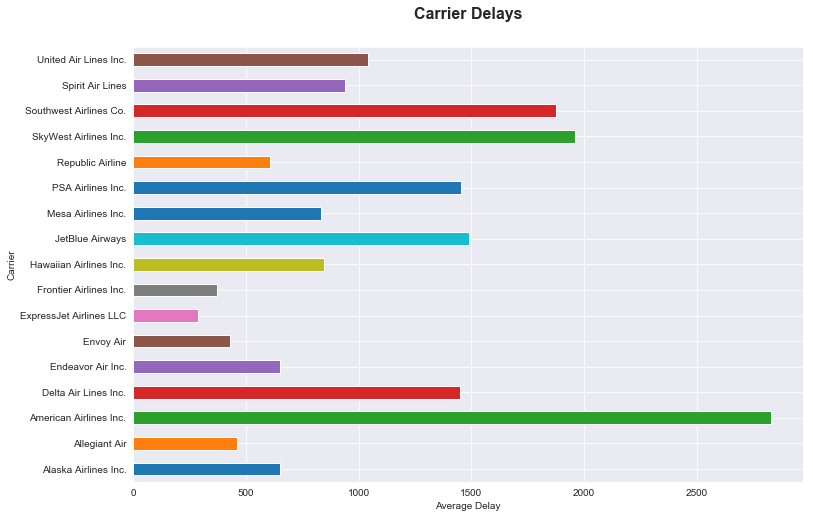

In [43]:
plt = df_flights.groupby('carrier_name')['carrier_delay_in_min'].mean().plot(kind='barh', figsize=(12,8));
plt.set_title('Carrier Delays', y=1.05, fontsize=16, fontweight='bold')
plt.set_xlabel('Average Delay')
plt.set_ylabel('Carrier');

#### Graph 1 - Observation

On major airlines, American Airlines delayed the most, followed by Skywest and Southwest. During earlier exploration, we saw that, both american airlines and skywest operated in huge numbers, compared to southwest. So, delay relating to southwest seems to be significant as well.

#### Graph 2 - Late Aircraft Delays per Carrier

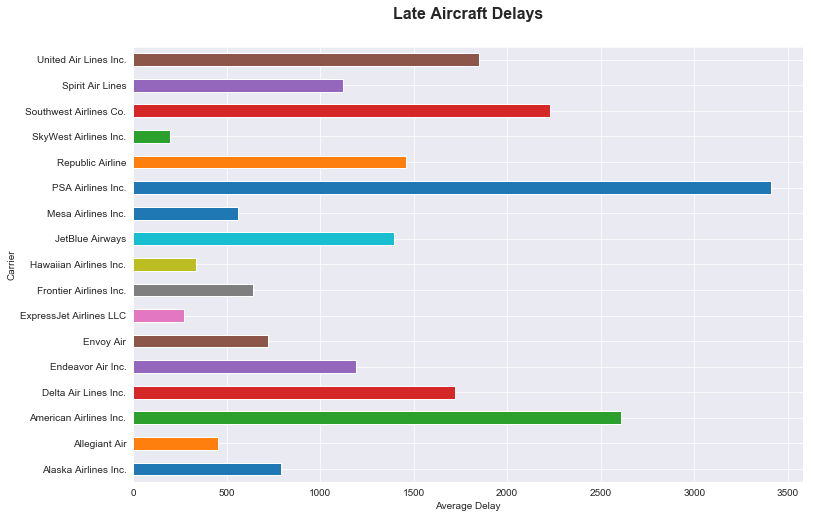

In [44]:
plt = df_flights.groupby('carrier_name')['late_aircraft_delay_in_min'].mean().plot(kind='barh', figsize=(12,8));
plt.set_title('Late Aircraft Delays', y=1.05, fontsize=16, fontweight='bold')
plt.set_xlabel('Average Delay')
plt.set_ylabel('Carrier');

#### Graph 2 - Observation

Aircraft related delays are the most, for PSA Airlines, followed by American & SouthWest Airlines. United Airlines are also not far behind. Aircraft related delays are least for SkyWest, possibly either they have a huge arsenal of aircrafts compared to the others, or they maintain those well enough, than others.

#### Graph 3 - Weather Delays per Carrier

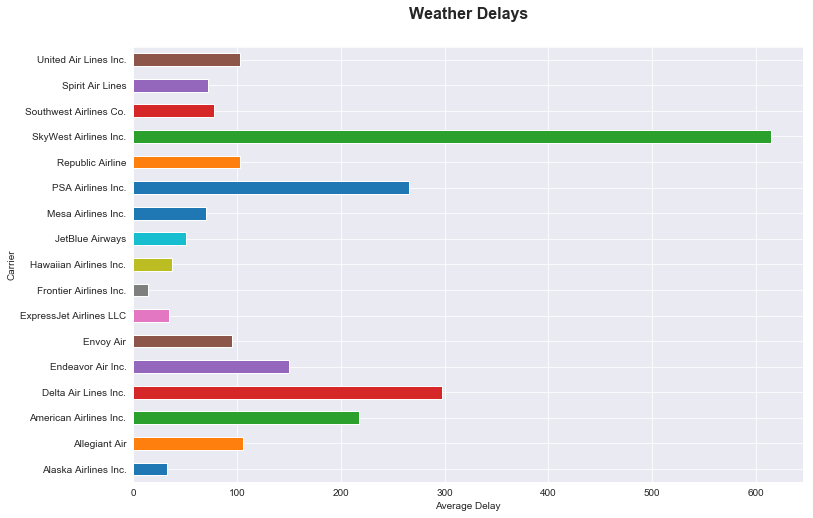

In [45]:
plt = df_flights.groupby('carrier_name')['weather_delay_in_min'].mean().plot(kind='barh', figsize=(12,8));
plt.set_title('Weather Delays', y=1.05, fontsize=16, fontweight='bold')
plt.set_xlabel('Average Delay')
plt.set_ylabel('Carrier');

#### Graph 3 - Observation

SkyWest encounters the most weather related delay, followed by PSA & Delta. While Frontier Airlines suffers the least, due to weather.

#### Graph 4 - Statewise Weather Delays

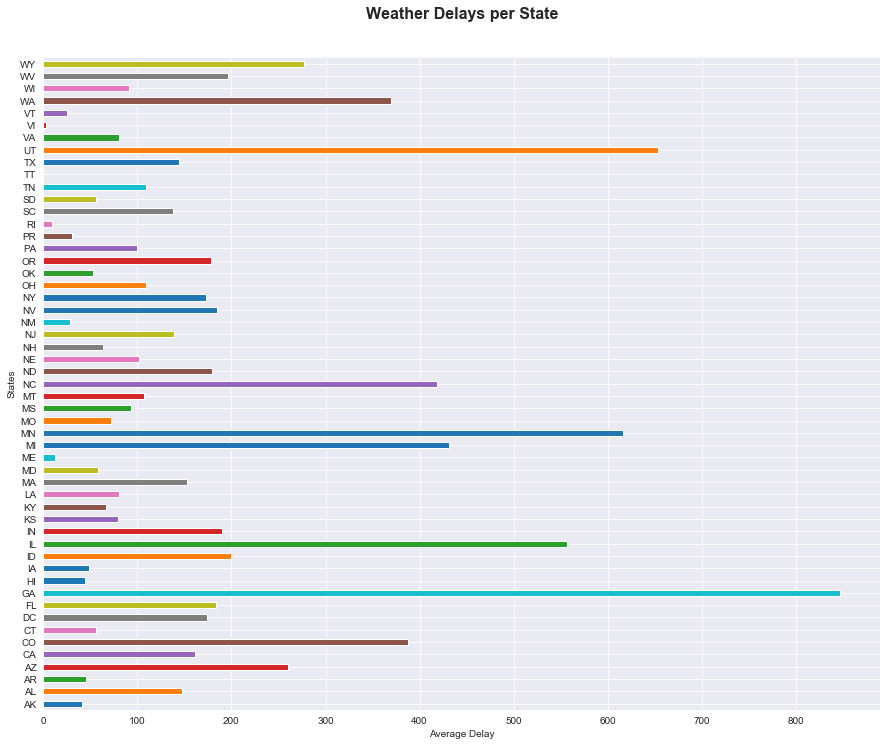

In [46]:
plt = df_flights.groupby('state_name')['weather_delay_in_min'].mean().plot(kind='barh', figsize=(15,12));
plt.set_title('Weather Delays per State', y=1.05, fontsize=16, fontweight='bold')
plt.set_xlabel('Average Delay')
plt.set_ylabel('States');

#### Graph 4 - Observation

Weather delays are most for states like Georgia, Minnesota, Utah and Illionois, mainly for hostile winter conditions, during the month of feb. Weather delays are much lower at west coast during feb.

In [47]:
# As we have enormous amount of data, let's select top airports, in terms of flights operated
np.unique(df_flights.sort_values('arrival_flight_count', ascending=False)[['airport_name']].head(10))

array(['Charlotte Douglas International', "Chicago O'Hare International",
       'Dallas Love Field', 'Dallas/Fort Worth International',
       'Denver International', 'Hartsfield-Jackson Atlanta International',
       'McCarran International', 'Seattle/Tacoma International'],
      dtype=object)

In [48]:
df_flights.columns

Index(['carrier_name', 'arrival_flight_count', 'arrival_delay_in_min',
       'air_carrier_related_delay_count', 'weather_related_delay_count',
       'NAS_related_delay_count', 'security_related_delay_count',
       'late_aircraft_related_delay_count', 'arrival_canceled_count',
       'arrival_diverted_count', 'carrier_delay_in_min',
       'weather_delay_in_min', 'nas_delay_in_min', 'security_delay_in_min',
       'late_aircraft_delay_in_min', 'airport_name', 'city_name',
       'state_name'],
      dtype='object')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Since we are observing data for one of the winter months (feb), so a lot of delay is caused in colder states and also for those airlines that operate in that region. Later we would specifically study these aspects in multi-variate analysis.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Some airlines are doing better than others, even when operaing in colder states. Also, in some unlikely cases, security delay and NAS delays are also taking part of the overall delay caused. We would study these relationships in multi-variate analysis.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Graph 1 - Arrival Flight Count vs Arrival Delay, for all airlines

In [49]:
df_flights.arrival_flight_count.describe()

count     1769.000000
mean       324.628604
std        896.920719
min          1.000000
25%         42.000000
50%         87.000000
75%        219.000000
max      18334.000000
Name: arrival_flight_count, dtype: float64

In [50]:
df_flights.arrival_delay_in_min.describe()

count    1769.000000
mean       47.832674
std       131.541346
min         0.000000
25%         6.000000
50%        15.000000
75%        35.000000
max      2605.000000
Name: arrival_delay_in_min, dtype: float64

In [51]:
np.unique(df_flights['carrier_name'])

array(['Alaska Airlines Inc.', 'Allegiant Air', 'American Airlines Inc.',
       'Delta Air Lines Inc.', 'Endeavor Air Inc.', 'Envoy Air',
       'ExpressJet Airlines LLC', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'JetBlue Airways', 'Mesa Airlines Inc.',
       'PSA Airlines Inc.', 'Republic Airline', 'SkyWest Airlines Inc.',
       'Southwest Airlines Co.', 'Spirit Air Lines',
       'United Air Lines Inc.'], dtype=object)

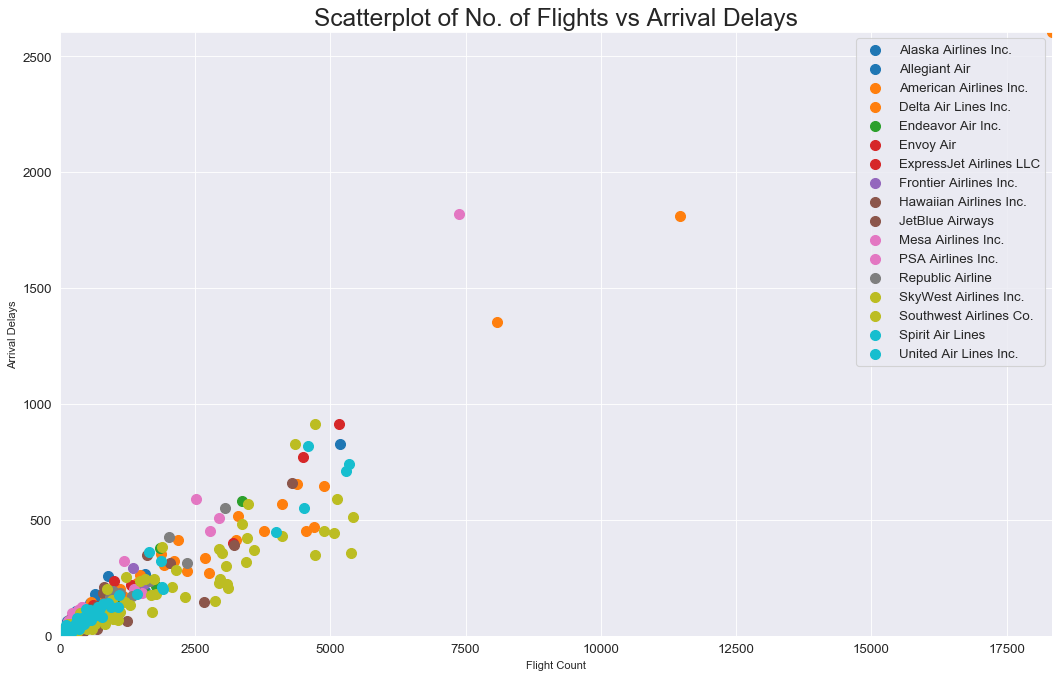

In [54]:
categories = np.unique(df_flights['carrier_name'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('arrival_flight_count', 'arrival_delay_in_min', 
                data=df_flights.loc[df_flights.carrier_name==category, :], 
                s=80, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 18334), ylim=(0, 2605),
              xlabel='Flight Count', ylabel='Arrival Delays')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of No. of Flights vs Arrival Delays", fontsize=22)
plt.legend(fontsize=12)    
plt.show() 

# ref - https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

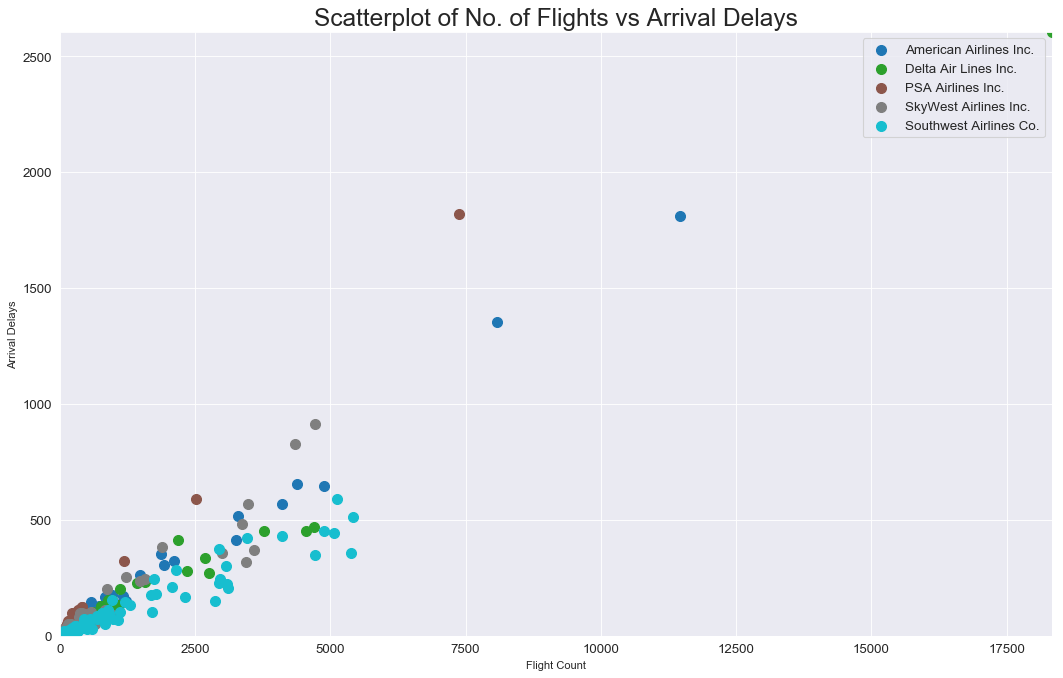

In [55]:
categories = ['American Airlines Inc.',
       'Delta Air Lines Inc.', 'PSA Airlines Inc.', 'SkyWest Airlines Inc.',
       'Southwest Airlines Co.']
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('arrival_flight_count', 'arrival_delay_in_min', 
                data=df_flights.loc[df_flights.carrier_name==category, :], 
                s=80, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 18334), ylim=(0, 2605),
              xlabel='Flight Count', ylabel='Arrival Delays')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of No. of Flights vs Arrival Delays", fontsize=22)
plt.legend(fontsize=12)    
plt.show() 

#### Graph 1 - Observation

Mostly, positive co-relation is seen between number of flights and airline operates and amount of flight delays it causes. In certain cases, American airlines have caused huge delays owing to enormous number of flights operated. However, its clearly indicated that, under quite high flight counts, skywest and southwest were able to keep the arrival delays at minimum.

I cannot plot this graph in statewise (categorical) manner due to the fact that, states are huge in numbers and it would be difficult to plot as categories.

At the second scatter, I only plotted data, on the basis of the said five airlines, in order to have clear distinctive colors to differentiate. SouthWest is performing a lot better here.

#### Graph 2 - Arrival Flight Count vs Carrier Related Delay, for all airlines

In [56]:
# Let's keep the column names handy
df_flights.columns

Index(['carrier_name', 'arrival_flight_count', 'arrival_delay_in_min',
       'air_carrier_related_delay_count', 'weather_related_delay_count',
       'NAS_related_delay_count', 'security_related_delay_count',
       'late_aircraft_related_delay_count', 'arrival_canceled_count',
       'arrival_diverted_count', 'carrier_delay_in_min',
       'weather_delay_in_min', 'nas_delay_in_min', 'security_delay_in_min',
       'late_aircraft_delay_in_min', 'airport_name', 'city_name',
       'state_name'],
      dtype='object')

In [57]:
df_flights.carrier_delay_in_min.describe()

count     1769.000000
mean      1149.529112
std       3622.140770
min          0.000000
25%         97.000000
50%        321.000000
75%        864.000000
max      57477.000000
Name: carrier_delay_in_min, dtype: float64

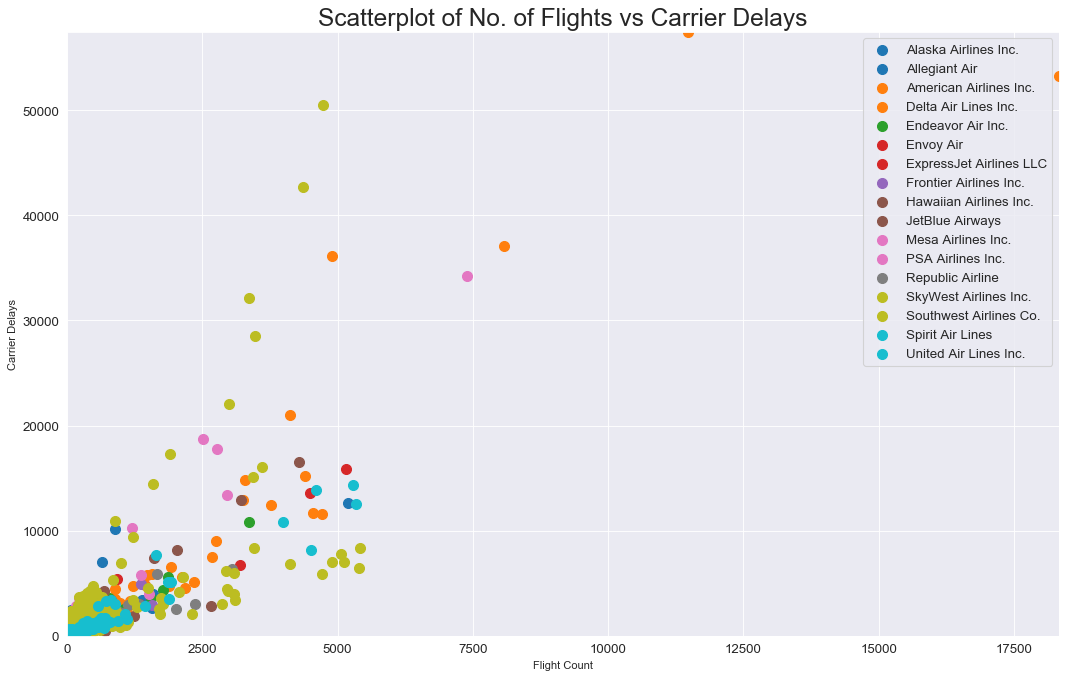

In [58]:
categories = np.unique(df_flights['carrier_name'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('arrival_flight_count', 'carrier_delay_in_min', 
                data=df_flights.loc[df_flights.carrier_name==category, :], 
                s=80, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 18334), ylim=(0, 57477),
              xlabel='Flight Count', ylabel='Carrier Delays')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of No. of Flights vs Carrier Delays", fontsize=22)
plt.legend(fontsize=12)    
plt.show()

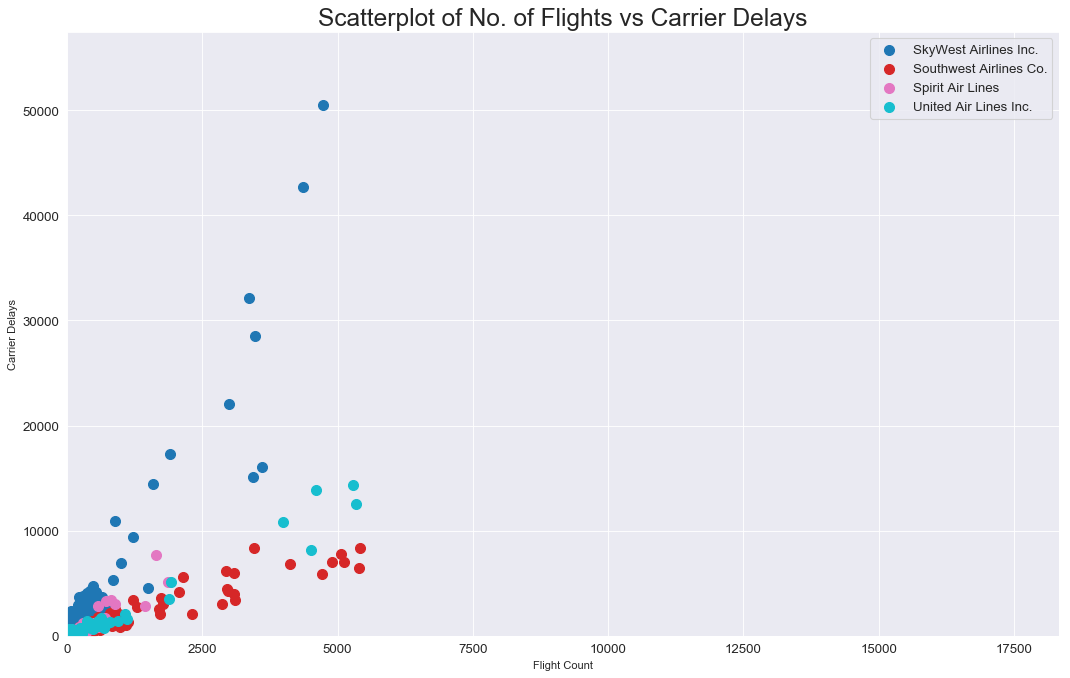

In [59]:
categories = ['SkyWest Airlines Inc.',
       'Southwest Airlines Co.', 'Spirit Air Lines',
       'United Air Lines Inc.']
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('arrival_flight_count', 'carrier_delay_in_min', 
                data=df_flights.loc[df_flights.carrier_name==category, :], 
                s=80, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 18334), ylim=(0, 57477),
              xlabel='Flight Count', ylabel='Carrier Delays')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of No. of Flights vs Carrier Delays", fontsize=22)
plt.legend(fontsize=12)    
plt.show()

#### Graph 2 - Observation

While we plotted the number of flights operated vs the carrier related delays, a not so positive corelation found. Later we narrowed down our plotting by selecting the key operators, as per the first graph. Southwest is clearly minimized the carrier related delays, while skywest delays are quite, all over the place.

In [60]:
# Let's keep the column names handy
df_flights.columns

Index(['carrier_name', 'arrival_flight_count', 'arrival_delay_in_min',
       'air_carrier_related_delay_count', 'weather_related_delay_count',
       'NAS_related_delay_count', 'security_related_delay_count',
       'late_aircraft_related_delay_count', 'arrival_canceled_count',
       'arrival_diverted_count', 'carrier_delay_in_min',
       'weather_delay_in_min', 'nas_delay_in_min', 'security_delay_in_min',
       'late_aircraft_delay_in_min', 'airport_name', 'city_name',
       'state_name'],
      dtype='object')

In [61]:
# As we have enormous amount of data, let's select top airlines, in terms of flights operated
np.unique(df_flights.sort_values('arrival_flight_count', ascending=False)[['carrier_name']].head(20))

array(['Alaska Airlines Inc.', 'American Airlines Inc.',
       'Delta Air Lines Inc.', 'Envoy Air', 'PSA Airlines Inc.',
       'SkyWest Airlines Inc.', 'Southwest Airlines Co.',
       'United Air Lines Inc.'], dtype=object)

In [62]:
# As we have enormous amount of data, let's select top airports, in terms of flights operated
np.unique(df_flights.sort_values('arrival_flight_count', ascending=False)[['airport_name']].head(10))

array(['Charlotte Douglas International', "Chicago O'Hare International",
       'Dallas Love Field', 'Dallas/Fort Worth International',
       'Denver International', 'Hartsfield-Jackson Atlanta International',
       'McCarran International', 'Seattle/Tacoma International'],
      dtype=object)

#### Graph 3 - Airport wise Flight Count vs Delay

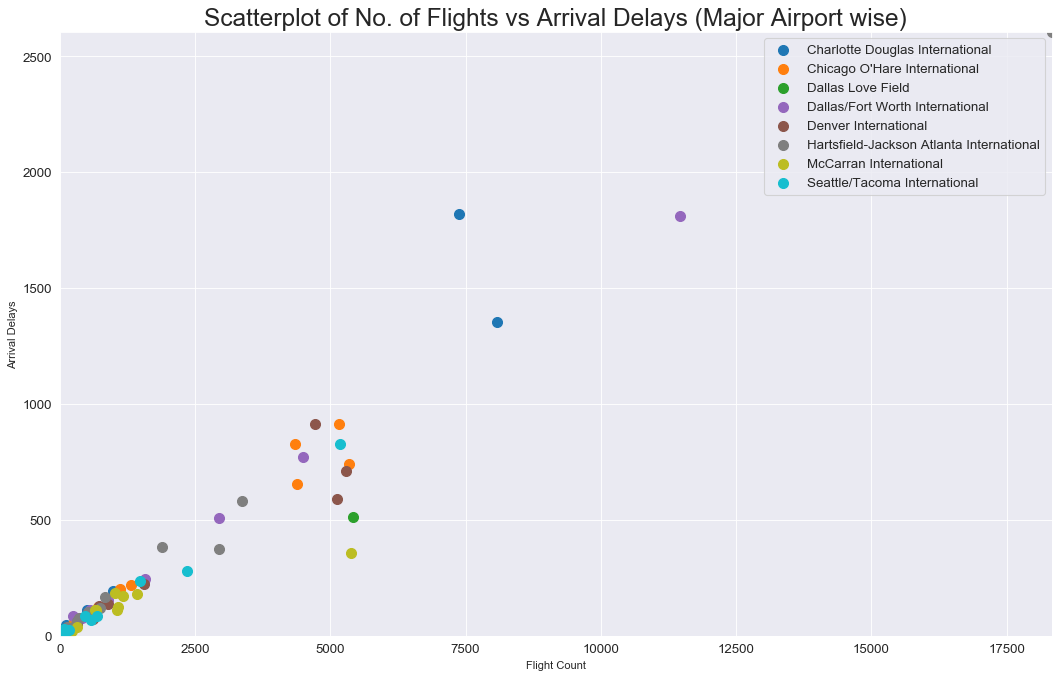

In [63]:
categories = ['Charlotte Douglas International', "Chicago O'Hare International",
       'Dallas Love Field', 'Dallas/Fort Worth International',
       'Denver International', 'Hartsfield-Jackson Atlanta International',
       'McCarran International', 'Seattle/Tacoma International']
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('arrival_flight_count', 'arrival_delay_in_min', 
                data=df_flights.loc[df_flights.airport_name==category, :], 
                s=80, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 18334), ylim=(0, 2605),
              xlabel='Flight Count', ylabel='Arrival Delays')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of No. of Flights vs Arrival Delays (Major Airport wise)", fontsize=22)
plt.legend(fontsize=12)    
plt.show()

#### Graph 3 - Observation

Under major airports handling most amount of incoming flights, McCarran, Dallas Love Field, Seattle and Atlanta airports are handling the arrival delays the most (in one case, seattle also caused huge arrival delay), while Charlotte Douglas need to pay attention of arrival delays. On the other hand, we are seeing, quite frequent arrival delays for Chicago O'Hare, while operating medium to high flights.

In [64]:
# Again, let's keep the column names handy
df_flights.columns

Index(['carrier_name', 'arrival_flight_count', 'arrival_delay_in_min',
       'air_carrier_related_delay_count', 'weather_related_delay_count',
       'NAS_related_delay_count', 'security_related_delay_count',
       'late_aircraft_related_delay_count', 'arrival_canceled_count',
       'arrival_diverted_count', 'carrier_delay_in_min',
       'weather_delay_in_min', 'nas_delay_in_min', 'security_delay_in_min',
       'late_aircraft_delay_in_min', 'airport_name', 'city_name',
       'state_name'],
      dtype='object')

As per earlier graph, we can see, while operating moderate to high number of flights, two airports, namely 'Chicago O'Hare International' and 'Denver International' caused noticeable arrival delays. We would inspect those now.

In [65]:
df_flights[df_flights['airport_name'] == "Chicago O'Hare International"].describe()

,arrival_flight_count,arrival_delay_in_min,air_carrier_related_delay_count,weather_related_delay_count,NAS_related_delay_count,security_related_delay_count,late_aircraft_related_delay_count,arrival_canceled_count,arrival_diverted_count,carrier_delay_in_min,weather_delay_in_min,nas_delay_in_min,security_delay_in_min,late_aircraft_delay_in_min
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2029.833333,334.666667,78.666667,13.583333,146.166667,0.250000,94.166667,35.000000,1.25000,8396.083333,1550.166667,10771.166667,13.833333,8497.250000
std,2109.110577,343.005787,106.270952,22.920647,141.008596,0.621582,119.150656,50.635956,1.13818,12247.507943,2541.855150,9723.281712,32.976116,10378.120982
min,183.000000,17.000000,3.000000,0.000000,9.000000,0.000000,3.000000,0.000000,0.00000,170.000000,0.000000,817.000000,0.000000,282.000000
25%,244.500000,54.500000,11.750000,0.750000,31.000000,0.000000,12.000000,1.000000,0.75000,968.750000,133.250000,3113.750000,0.000000,1091.750000
50%,1111.000000,191.500000,25.000000,4.000000,93.000000,0.000000,38.000000,12.500000,1.00000,2989.500000,543.000000,6957.000000,0.000000,4817.500000
75%,4365.500000,677.500000,132.500000,9.000000,263.000000,0.000000,122.000000,39.000000,2.00000,13195.000000,1202.000000,17267.500000,5.000000,10074.250000
max,5348.000000,912.000000,362.000000,69.000000,363.000000,2.000000,358.000000,137.000000,4.00000,42664.000000,8256.000000,26942.000000,113.000000,29922.000000


In [66]:
df_flights[df_flights['airport_name'] == "Denver International"].describe()

,arrival_flight_count,arrival_delay_in_min,air_carrier_related_delay_count,weather_related_delay_count,NAS_related_delay_count,security_related_delay_count,late_aircraft_related_delay_count,arrival_canceled_count,arrival_diverted_count,carrier_delay_in_min,weather_delay_in_min,nas_delay_in_min,security_delay_in_min,late_aircraft_delay_in_min
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1770.272727,259.545455,87.818182,7.636364,104.727273,0.454545,56.909091,18.636364,2.181818,7443.545455,1009.272727,5399.000000,32.363636,4308.363636
std,2151.055977,321.508744,140.360834,18.505527,128.117985,1.213560,77.114790,36.467171,3.400535,14879.169919,2674.699575,6686.873455,75.768427,5571.345031
min,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000
25%,231.000000,37.500000,10.500000,0.000000,17.000000,0.000000,5.500000,1.000000,0.000000,560.500000,7.500000,1038.500000,0.000000,611.500000
50%,717.000000,128.000000,37.000000,0.000000,50.000000,0.000000,31.000000,2.000000,1.000000,2089.000000,89.000000,3172.000000,0.000000,2227.000000
75%,3145.500000,406.000000,102.500000,3.500000,157.500000,0.000000,56.500000,12.000000,2.500000,4970.500000,299.000000,7004.500000,2.000000,5634.000000
max,5285.000000,912.000000,473.000000,62.000000,342.000000,4.000000,218.000000,119.000000,10.000000,50478.000000,9004.000000,20696.000000,235.000000,18279.000000


If we see the characteristics of the major airports causing arrival delays as above, in both of the cases, weather delay and late aircraft delays have caused the arrival delays. And late aircraft delays can also be caused by weather. We can conclude, mainly the weather/snowy conditions during feb, is causing arrival delays for the major airports.

#### Graph 4 - Major Flights & States, in terms of frequency

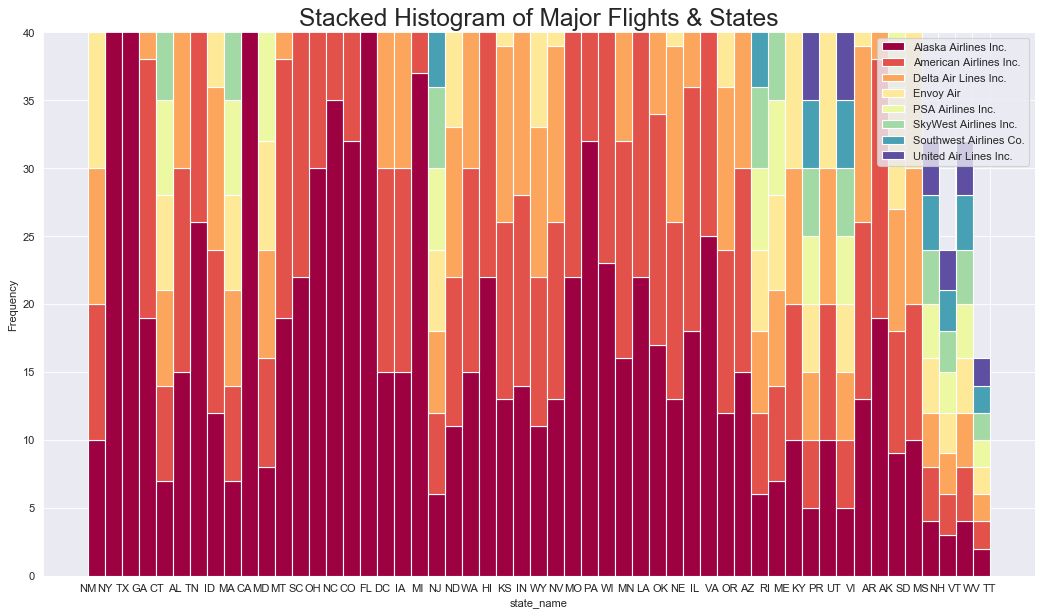

In [67]:
df_flights_filtered = df_flights[df_flights['carrier_name'].isin(['Alaska Airlines Inc.', 'American Airlines Inc.',
       'Delta Air Lines Inc.', 'Envoy Air', 'PSA Airlines Inc.',
       'SkyWest Airlines Inc.', 'Southwest Airlines Co.',
       'United Air Lines Inc.'])]

x_var = 'state_name'
groupby_var = 'carrier_name'
df_agg = df_flights_filtered.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df_flights_filtered[x_var].values.tolist() for i, df in df_agg]


plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df_flights_filtered[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

plt.legend({group:col for group, col in zip(np.unique(df_flights_filtered[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of Major Flights & States", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 40)
#plt.xticks(labels=np.unique(df_flights_filtered[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

# ref - https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

Now, I would be filtering data with 7 coldest states in the US, as per - 
https://www.traveltrivia.com/coldest-states-in-the-u-s/,
to see how the airlines, which operated in those states, performed...

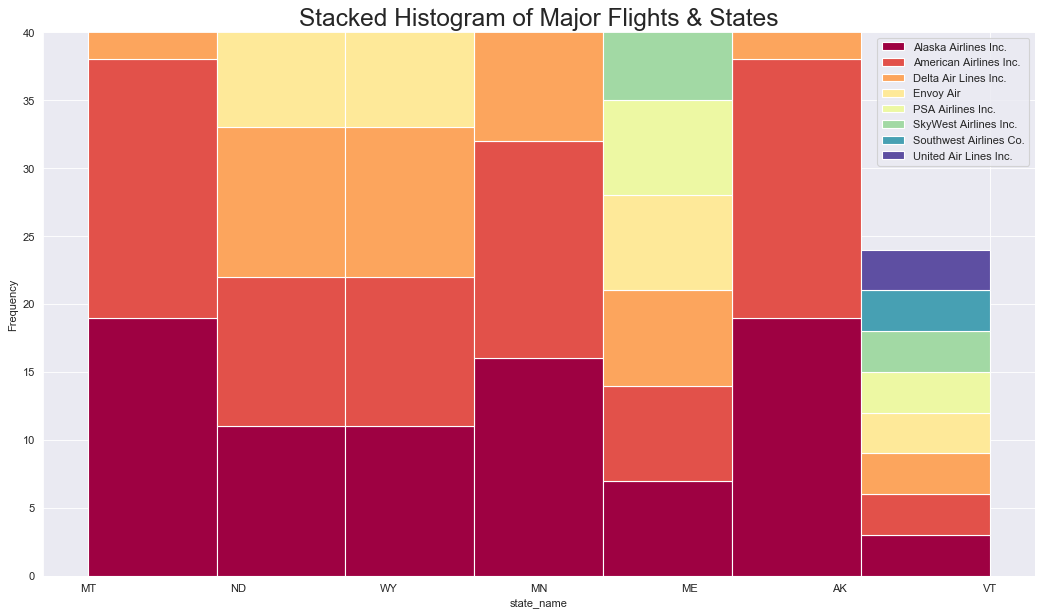

In [68]:
df_flights_filtered_interm = df_flights[df_flights['carrier_name'].isin(['Alaska Airlines Inc.', 'American Airlines Inc.',
       'Delta Air Lines Inc.', 'Envoy Air', 'PSA Airlines Inc.',
       'SkyWest Airlines Inc.', 'Southwest Airlines Co.',
       'United Air Lines Inc.'])]

df_flights_filtered = df_flights_filtered_interm[df_flights_filtered_interm['state_name'].isin(['MT', 'VT', 'WY', 'MN', 
                                                                                               'ME', 'ND', 'AK'])]

x_var = 'state_name'
groupby_var = 'carrier_name'
df_agg = df_flights_filtered.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df_flights_filtered[x_var].values.tolist() for i, df in df_agg]


plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df_flights_filtered[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

plt.legend({group:col for group, col in zip(np.unique(df_flights_filtered[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of Major Flights & States", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 40)
#plt.xticks(labels=np.unique(df_flights_filtered[x_var]).tolist(), rotation=90, horizontalalignment='left')
plt.show()

#### Graph 4 - Observation

So, even when southwest has performed best in terms of arrival delay, we should note that, it only operated in one of the seven coldest states in the US, during the month of feb. We would say, delta is the stand-out performer, while operating in the coldest of the states, while PSA comes second.

In [70]:
df_flights.columns

Index(['carrier_name', 'arrival_flight_count', 'arrival_delay_in_min',
       'air_carrier_related_delay_count', 'weather_related_delay_count',
       'NAS_related_delay_count', 'security_related_delay_count',
       'late_aircraft_related_delay_count', 'arrival_canceled_count',
       'arrival_diverted_count', 'carrier_delay_in_min',
       'weather_delay_in_min', 'nas_delay_in_min', 'security_delay_in_min',
       'late_aircraft_delay_in_min', 'airport_name', 'city_name',
       'state_name'],
      dtype='object')

In [89]:
df_flights.nas_delay_in_min.describe()

count     1769.000000
mean       779.407575
std       2789.305320
min          0.000000
25%         47.000000
50%        146.000000
75%        420.000000
max      56818.000000
Name: nas_delay_in_min, dtype: float64

#### Graph - 5 NAS Delay Characteristics

Although this is a bi-variate representation, but adding it here, as part of studying not-so-common characteristics

<Figure size 160x100 with 0 Axes>

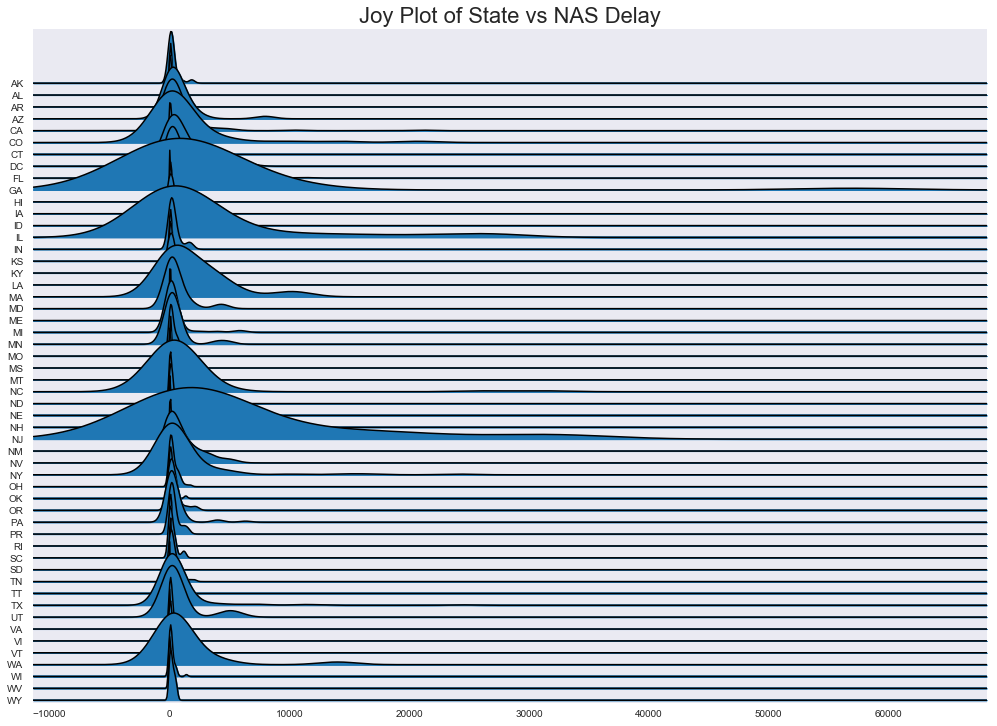

In [88]:
#!pip install joypy
import joypy
plt.figure(figsize=(16,10), dpi= 10)
fig, axes = joypy.joyplot(df_flights, column=['nas_delay_in_min'], 
                          by="state_name", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot of State vs NAS Delay', fontsize=22)
plt.show();

#### Grpah 5 - Observation

States like Georgia, Illionois, Massachusetts and new jersey caused enormous NAS related delays

In [92]:
df_flights.columns

Index(['carrier_name', 'arrival_flight_count', 'arrival_delay_in_min',
       'air_carrier_related_delay_count', 'weather_related_delay_count',
       'NAS_related_delay_count', 'security_related_delay_count',
       'late_aircraft_related_delay_count', 'arrival_canceled_count',
       'arrival_diverted_count', 'carrier_delay_in_min',
       'weather_delay_in_min', 'nas_delay_in_min', 'security_delay_in_min',
       'late_aircraft_delay_in_min', 'airport_name', 'city_name',
       'state_name'],
      dtype='object')

In [94]:
df_flights.security_delay_in_min.describe()

count    1769.000000
mean        4.323912
std        32.985972
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1185.000000
Name: security_delay_in_min, dtype: float64

In [96]:
df_flights.arrival_flight_count.describe()

count     1769.000000
mean       324.628604
std        896.920719
min          1.000000
25%         42.000000
50%         87.000000
75%        219.000000
max      18334.000000
Name: arrival_flight_count, dtype: float64

#### Graph 6 - Security delays for Major Airports

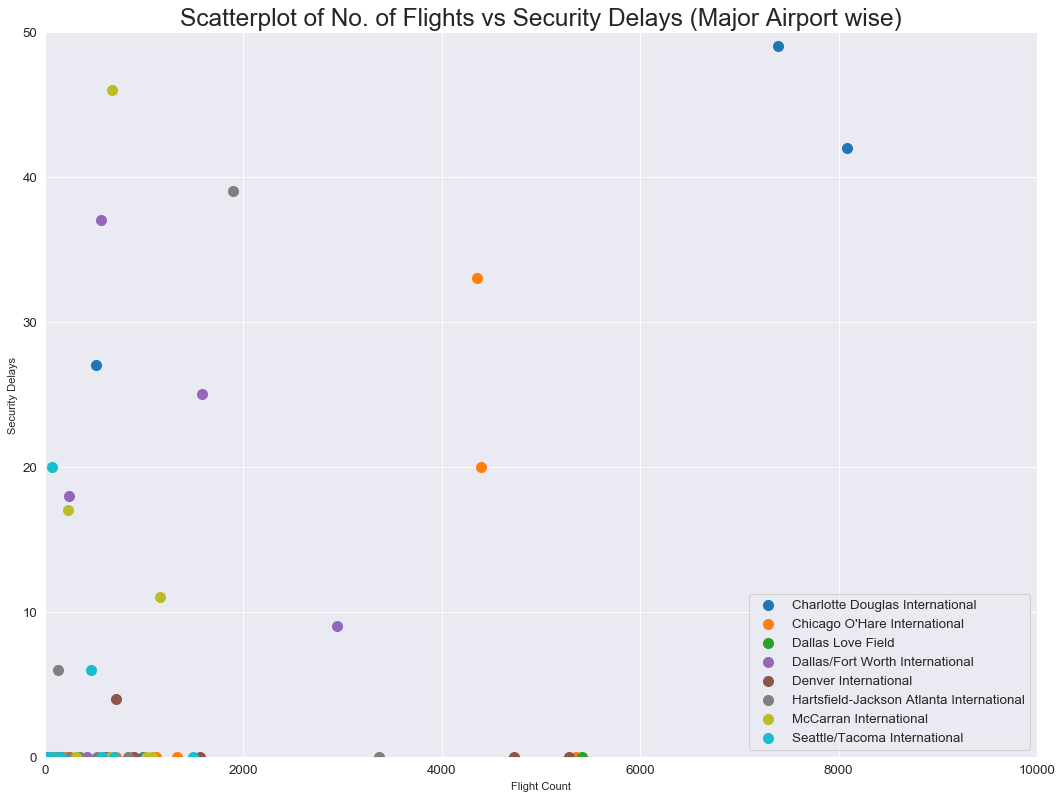

In [105]:
categories = ['Charlotte Douglas International', "Chicago O'Hare International",
       'Dallas Love Field', 'Dallas/Fort Worth International',
       'Denver International', 'Hartsfield-Jackson Atlanta International',
       'McCarran International', 'Seattle/Tacoma International']
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('arrival_flight_count', 'security_delay_in_min', 
                data=df_flights.loc[df_flights.airport_name==category, :], 
                s=80, c=colors[i], label=str(category))

plt.gca().set(xlim=(0, 10000), ylim=(0, 50),
              xlabel='Flight Count', ylabel='Security Delays')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of No. of Flights vs Security Delays (Major Airport wise)", fontsize=22)
plt.legend(fontsize=12)    
plt.show()

#### Graph 6 - Observation

Charlotte Douglas, Chicago O'Hare & Dallas Fort Worth had security related delays in the past. So, probably some security hindrances might have happened in those airports. So, it might be better to modernize/automate secury in those airports, thus ensuring lesser delays in future, for huge number of passengers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Since we were seeing the flight delay data, corresponding to the months of february, so we would assume that, there would be a number of states is US, which still have winter/snowy conditions. This in fact inflicted a huge amount of delay in flight operations, especially for the states like Montana, Wyoming, Alaska, Minnesota etc.

> Also we have noticed a handful of carriers, for example, delta & PSA, continued operations with minimal delay across the US, while including those cold states as well.

> Airports like/including McCarran, Dallas Love Field, Seattle and Atlanta have handled enormous amout of traffic, without significant delay. These should be role-model for flight operations, for other bigger airports to follow.


### Were there any interesting or surprising interactions between features?

> Certain states like Georgia, Illionois, Massachusetts and new jersey caused enormous NAS related delays. They might figure out ways to reduce the National Aviation related delays.

> Charlotte Douglas, Chicago O'Hare & Dallas Fort Worth had security related delays in the past. So, probably some security hindrances might have happened in those airports. So, it might be better to modernize/automate secury in those airports, thus ensuring lesser delays in future, for huge number of passengers.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [106]:
# Saving the cleaned data frame. It would be used in slide deck notebook
df_flights.to_csv('flight_clean.csv', index = False)